In [24]:
# NOTE: Install with pip install sixdrepnet
from sixdrepnet import SixDRepNet
import cv2
import os 
from tqdm import tqdm 
import json 
import numpy as np 
import re 




main_folder ="../../FR_DATASETS"
main_output_folder = "HEAD_POSE_ESTIMATIONS_ID-Booth_FR"


# synth_folders = ["12-2024_SD21_LoRA4_alphaW0.1_Face", "12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments"]
synth_folders = ["12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB",
                #"12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_AgePhases_Expression_BackgroundB"
                ]
# synth_folders = [#"12-2024_SD21_LoRA4_alphaW0.1_FINAL_HeadshotPortrait_Gender_Pose_AgePhases_Background",
#                  #"12-2024_SD21_LoRA4_alphaW0.1_HeadShot_Photo_Gender_Age_Background"
#                 ]

real_folders = ["tufts_512_poses_1-7_all_imgs_jpg_per_ID", "FFHQ_512"]

loss_exps = ["no_new_Loss", "identity_loss_TimestepWeight", "triplet_prior_loss_TimestepWeight"]

all_folders = []
for fold in synth_folders: 
    for loss_exp in loss_exps: 
        all_folders.append(os.path.join(fold, loss_exp))

for fold in real_folders:
    all_folders.append(os.path.join(fold, "images"))


##############################################
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

##############################################

model = SixDRepNet()

for fold in all_folders: 
    for loss_exp in loss_exps:
        
        img_folder_path = f"{main_folder}/{fold}"#/{loss_exp}" 
        print(img_folder_path)

        output_folder = f"{main_output_folder}/{img_folder_path.split('/')[-2]}"
        os.makedirs(output_folder, exist_ok=True)
        output_file = f"{output_folder}/{img_folder_path.split('/')[-1]}.json"

        if os.path.exists(output_file): 
            print("Results already generated")
            continue 

        yaw_dist = []; pitch_dist = []; roll_dist = []
        yaw_per_id, pitch_per_id, roll_per_id = dict(),  dict(),  dict()
        
        imgs = os.listdir(img_folder_path)        
        imgs.sort(key=natural_keys)

        for img_name in tqdm(imgs): 
            #if "2_10" not in img_name:continue 
            img = cv2.imread(os.path.join(img_folder_path, img_name))
            # TODO add padding to better determine the pose of large obstructed faces
            img = cv2.copyMakeBorder(img, 50, 50, 50, 50, cv2.BORDER_CONSTANT)
            pitch, yaw, roll = model.predict(img)
            # print(pitch, yaw, roll)
            
            # Draw and show predictions
            # model.draw_axis(img, yaw, pitch, roll)
            # cv2.imshow(loss_exp, img)
            # cv2.waitKey(0)
            # break 

            pitch, yaw, roll = float(pitch), float(yaw), float(roll)

            yaw_dist.append(yaw)
            pitch_dist.append(pitch)
            roll_dist.append(roll)

            tmp_id = img_name.split("_")[0]
            if tmp_id not in yaw_per_id: 
                yaw_per_id[tmp_id] = [yaw]
                pitch_per_id[tmp_id] = [pitch]
                roll_per_id[tmp_id] = [roll]
                
            else: 
                yaw_per_id[tmp_id].append(yaw)
                pitch_per_id[tmp_id].append(pitch)
                roll_per_id[tmp_id].append(roll)
        #break 
        # continue 
        print(round(np.mean(yaw_dist), 3), round(np.std(yaw_dist),3) )

        result = {
                    "yaw": yaw_dist,
                    "yaw_per_id": yaw_per_id, 
                    "pitch": pitch_dist,
                    "pitch_per_id": pitch_per_id, 
                    "roll": roll_dist,
                    "roll_per_id": roll_per_id, 
            }

        with open(output_file, "w") as f: 
            json.dump(result, f)

        print("===" * 30)





../../FR_DATASETS/12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/no_new_Loss
Results already generated
../../FR_DATASETS/12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/no_new_Loss
Results already generated
../../FR_DATASETS/12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/no_new_Loss
Results already generated
../../FR_DATASETS/12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/identity_loss_TimestepWeight
Results already generated
../../FR_DATASETS/12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/identity_loss_TimestepWeight
Results already generated
../../FR_DATASETS/12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/identity_loss_TimestepWeight
Results already generated
../../FR_DATASETS/12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/triplet_prior_loss_TimestepWeight
Results already genera

In [25]:
new_order = []

for fold in all_folders: 
    #for loss_exp in loss_exps:
    #if "tufts" in fold or "FFHQ" in fold: loss_exp = "images"
    path = os.path.join(f"{fold}.json")#, f"{loss_exp}.json")
    new_order.append(path)

new_order

['12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/no_new_Loss.json',
 '12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/identity_loss_TimestepWeight.json',
 '12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/triplet_prior_loss_TimestepWeight.json',
 'tufts_512_poses_1-7_all_imgs_jpg_per_ID/images.json',
 'FFHQ_512/images.json']

In [26]:

name_translator_dict = dict()

for fold in all_folders: 
    #for loss_exp in loss_exps:
    add = ""
    if "tufts" in fold or "FFHQ" in fold: 
        new_name = f"{fold.split('_')[0]} {add}"

    else:
        #if "base" in fold: add = "Base"
        if "Face_Poses_Environments" in fold: add = "Complex"
        else: add = "Base"

        loss_add = ""
        if "no_new" in fold: loss_add = ""
        if "identity" in fold: loss_add = "+ ID"
        if "triplet_prior" in fold: loss_add = "+ TID"

        new_name = f"SD-2.1 {add} {loss_add}"
    name_translator_dict[f"{fold}.json"] = new_name 

name_translator_dict

{'12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/no_new_Loss.json': 'SD-2.1 Base ',
 '12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/identity_loss_TimestepWeight.json': 'SD-2.1 Base + ID',
 '12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/triplet_prior_loss_TimestepWeight.json': 'SD-2.1 Base + TID',
 'tufts_512_poses_1-7_all_imgs_jpg_per_ID/images.json': 'tufts ',
 'FFHQ_512/images.json': 'FFHQ '}

SD-2.1 Base  & $4.43 \pm 24.58$               $0.582 \pm 6.991$                 $0.101 \pm 3.336$ \\
SD-2.1 Base + ID & $6.752 \pm 31.771$               $1.103 \pm 8.328$                 $0.327 \pm 4.773$ \\
SD-2.1 Base + TID & $7.023 \pm 31.368$               $0.639 \pm 8.979$                 $0.246 \pm 5.33$ \\
tufts  & $4.851 \pm 24.654$               $1.513 \pm 6.691$                 $0.004 \pm 3.127$ \\
FFHQ  & $2.601 \pm 15.339$               $-3.779 \pm 8.769$                 $0.395 \pm 3.15$ \\


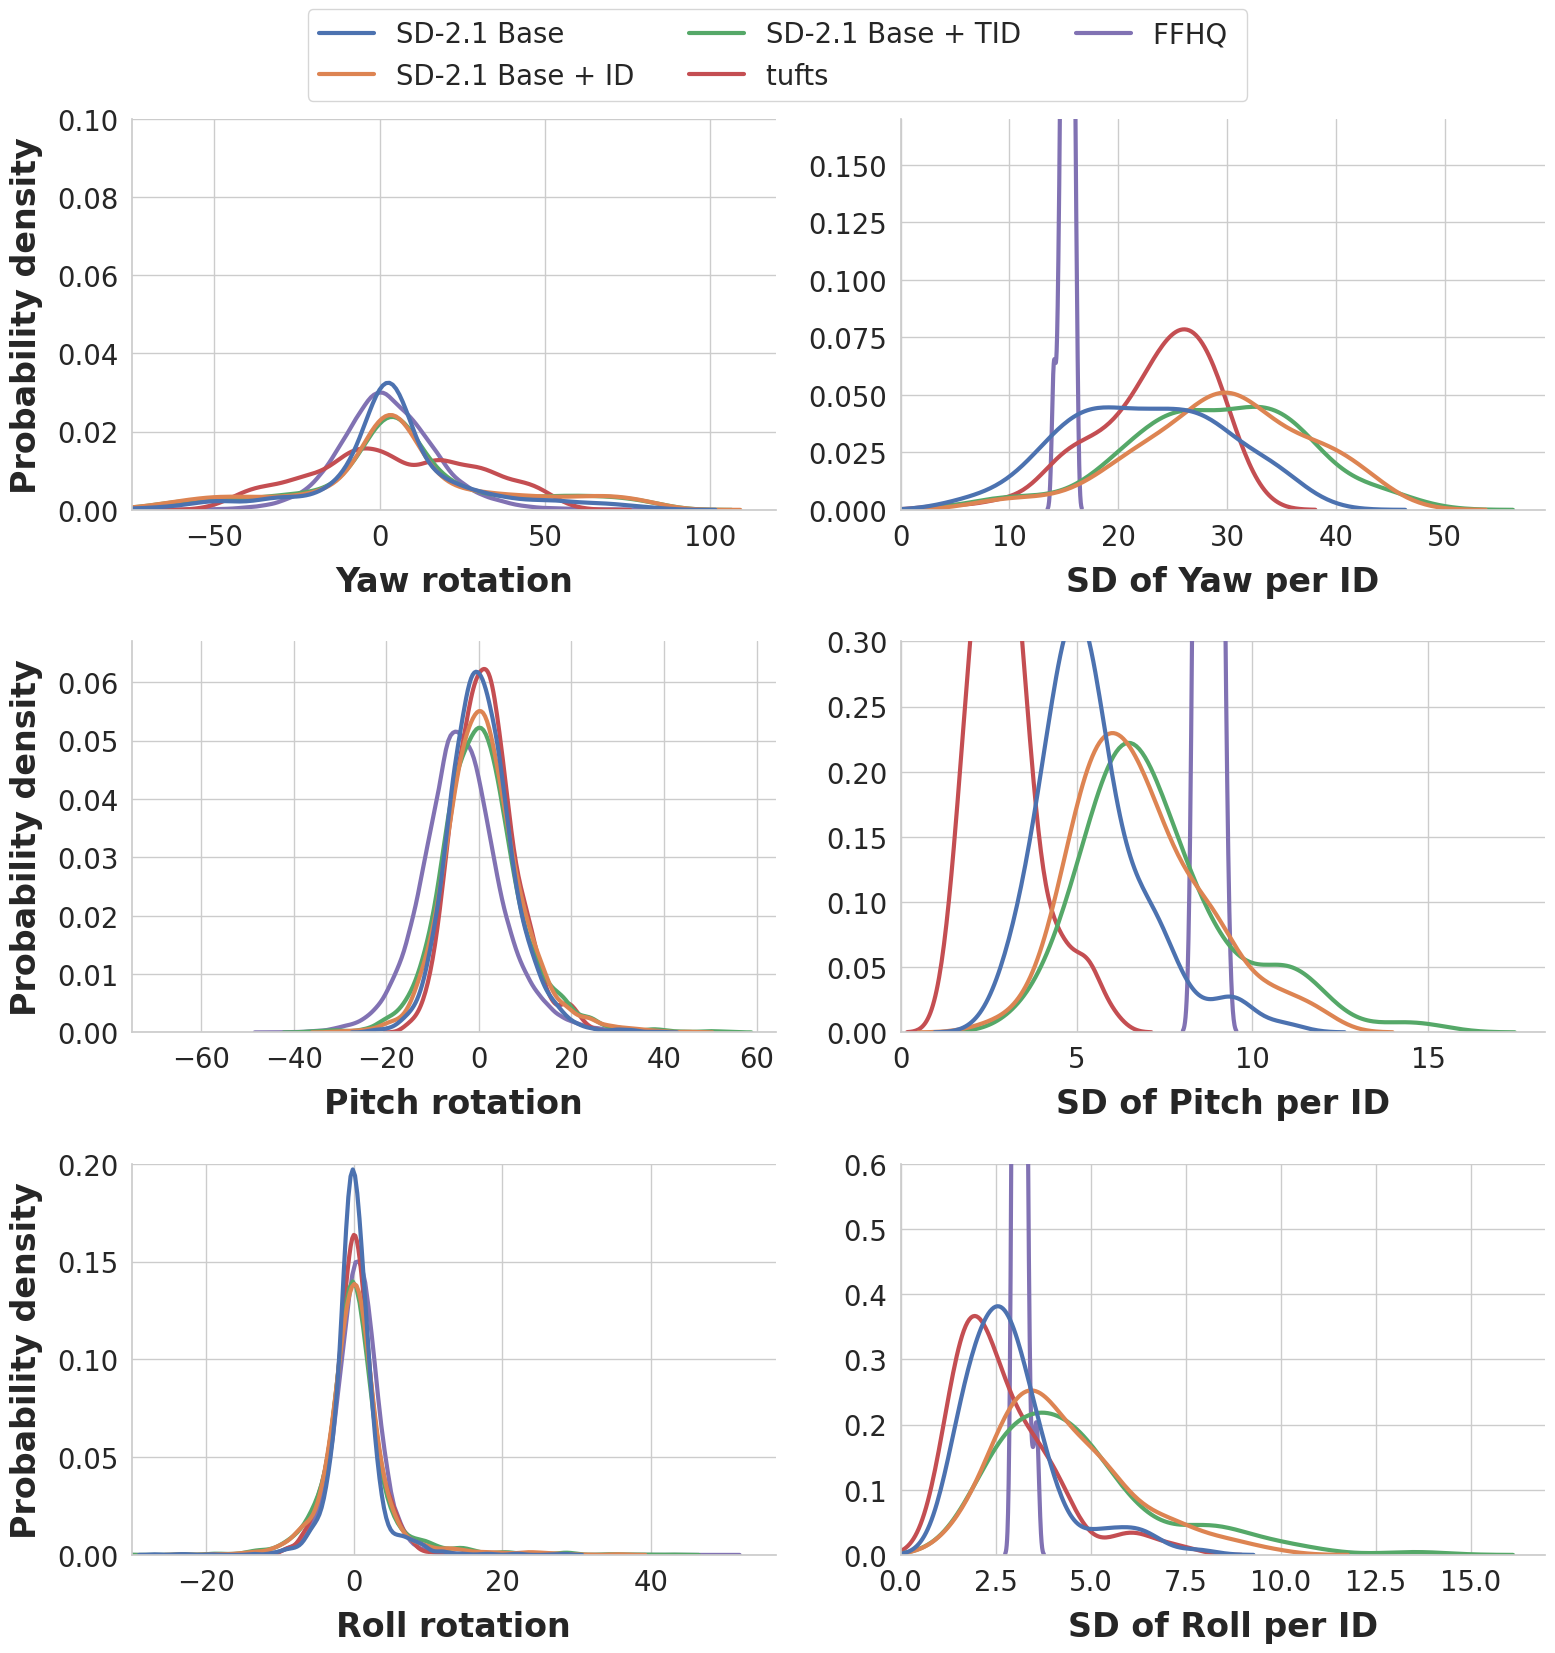

In [27]:

import os
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
def plot_sns_hist(data, ax, name, plot_y, fontsize, y_limit, x_zero_limits):    
    sns.set(font_scale=1.8)
    sns.set_style("whitegrid")

    #ax = sns.kdeplot(data=data, x="Scores", hue="Class",  common_norm=False, linewidth = 2.5)
    ax = sns.kdeplot(data=data,  common_norm=False, linewidth = 3, ax=ax, label=data.columns.tolist())
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.04))
    sns.despine(right=True)
    if plot_y:
        ax.set_xlabel(name, fontsize=fontsize, fontweight="bold", labelpad=10)
        ax.set_ylabel('Probability density', fontsize=fontsize, fontweight="bold", labelpad=10)
    else: 
        ax.set_xlabel(name, fontsize=fontsize, fontweight="bold", labelpad=10)
        ax.set_ylabel('')
    ax.get_legend().remove()

    ax.set_ylim(0.0, y_limit)

    if x_zero_limits != None:
        ax.set_xlim(x_zero_limits, None)
    fig.tight_layout()



files = os.listdir(output_folder)

files = [f for f in  new_order if f != " "]

df_yaw = pd.DataFrame()
df_yaw_per_id = pd.DataFrame()

df_pitch = pd.DataFrame()
df_pitch_per_id = pd.DataFrame()

df_roll = pd.DataFrame()
df_roll_per_id = pd.DataFrame()


fig, axs = plt.subplots(ncols=2,nrows=3,  figsize=(16,16))
fontsize = 24

#which_two_attributes = ["yaw", "yaw_per_id"]
# which_attributes = [["yaw", "yaw_per_id"], ["pitch", "pitch_per_id"], ["roll", "roll_per_id"]]


for file in files: 
    
    if "BACK" in file: continue 
    if file == " ": 
        print("\midrule")
        continue 
    
    #file = os.path.join(main_output_folder, file)
    filepath = os.path.join(main_output_folder, file)
    # print(filepath)
    with open(filepath) as f:
        res_json = json.load(f)

        file = name_translator_dict[file]
        print(f"{file} & ${round(np.mean(res_json['yaw']), 3)} \pm {round(np.std(res_json['yaw']), 3)}$ \
              ${round(np.mean(res_json['pitch']), 3)} \pm {round(np.std(res_json['pitch']), 3)}$ \
                ${round(np.mean(res_json['roll']), 3)} \pm {round(np.std(res_json['roll']), 3)}$" , end=" ")
        
        #file = file + f"()"
        print("\\\\")

        ### YAW 
        df_tmp = pd.DataFrame()
        df_tmp[file] = res_json["yaw"]
        df_yaw = pd.concat([df_yaw,df_tmp], axis=1)
        
        list_per_id = []
        dict_per_id = res_json["yaw_per_id"]

        for id in dict_per_id: 
            list_per_id.append(np.std(dict_per_id[id]))

        df_tmp = pd.DataFrame()
        df_tmp[file] = list_per_id
        df_yaw_per_id = pd.concat([df_yaw_per_id,df_tmp], axis=1)
        
        ### PITCH 
        df_tmp = pd.DataFrame()
        df_tmp[file] = res_json["pitch"]
        df_pitch = pd.concat([df_pitch,df_tmp], axis=1)
        
        list_per_id = []
        dict_per_id = res_json["pitch_per_id"]

        for id in dict_per_id: 
            list_per_id.append(np.std(dict_per_id[id]))

        df_tmp = pd.DataFrame()
        df_tmp[file] = list_per_id
        df_pitch_per_id = pd.concat([df_pitch_per_id,df_tmp], axis=1)

        ### ROLL 
        df_tmp = pd.DataFrame()
        df_tmp[file] = res_json["roll"]
        df_roll = pd.concat([df_roll,df_tmp], axis=1)
        
        list_per_id = []
        dict_per_id = res_json["roll_per_id"]

        for id in dict_per_id: 
            list_per_id.append(np.std(dict_per_id[id]))

        df_tmp = pd.DataFrame()
        df_tmp[file] = list_per_id
        df_roll_per_id = pd.concat([df_roll_per_id,df_tmp], axis=1)

        #df_pitch[file] = res_json['pitch']
        #df_roll[file] = res_json['roll']

# for attribute_names in which_attributes:

plot_sns_hist(df_yaw, axs[0][0], "Yaw rotation", plot_y=True, fontsize=fontsize, y_limit=0.1, x_zero_limits=-75)
plot_sns_hist(df_yaw_per_id, axs[0][1], "SD of Yaw per ID", plot_y=False, fontsize=fontsize, y_limit=0.17, x_zero_limits=0.0)

plot_sns_hist(df_pitch, axs[1][0], "Pitch rotation", plot_y=True, fontsize=fontsize, y_limit=0.067, x_zero_limits=-75)
plot_sns_hist(df_pitch_per_id, axs[1][1], "SD of Pitch per ID", plot_y=False, fontsize=fontsize, y_limit=0.30, x_zero_limits=0.0)

plot_sns_hist(df_roll, axs[2][0], "Roll rotation", plot_y=True, fontsize=fontsize, y_limit=0.2, x_zero_limits=-30)
plot_sns_hist(df_roll_per_id, axs[2][1], "SD of Roll per ID", plot_y=False, fontsize=fontsize, y_limit=0.6, x_zero_limits=0.0)



#axs[1].set_yticklabels([])
#axs[2].set_yticklabels([])
handles, labels = axs[0][0].get_legend_handles_labels()
labels_new = list(df_yaw.columns) 
labels_new = [l[:50] for l in labels_new ]
# print(labels)
handles.reverse()
fig.legend(handles, labels_new, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))
fig.tight_layout()
# fig.savefig("Paper_Head_Pose_estimation_DB.pdf", bbox_inches='tight') 

In [11]:


#files = os.listdir(output_folder)

to_plot = [f for f in  new_order if f != " "]
for file in new_order:#files: 
    # print(file)
    #print(file, )
    #print("")
    if "BACK" in file: continue 
    if file == " ": 
        print("\midrule")
        continue 
    
    #print(file)
    # filepath = 
    with open(os.path.join(main_output_folder, file)) as f:
        res_json = json.load(f)
        # print(res_json.keys())
        name = name_translator_dict[file]
        name = name.replace("95s", "").replace("  ", " ")
        
        yaw_per_id_dict = res_json["yaw_per_id"]
        
        std_per_id_list = []

        for id in yaw_per_id_dict:
            std_per_id_list.append(np.std(yaw_per_id_dict[id]))

        print(f"{name} & ${np.mean(res_json['yaw']):.3f} \pm {np.std(res_json['yaw']):.3f}$ &  ${np.mean(std_per_id_list):.3f} \pm {np.std(std_per_id_list):.3f}$ " , end=" ")
        print("\\\\")
        #print("\midrule")
        # print(f" & ${round(res_json['mean'], 3):.3f} \pm {round(res_json['std'], 3):.3f}$", end="")
                
    #break 
    # TUFTS (training)  & 95 & $6.505 \pm 1.643$ & $6.503 \pm 1.640$ \\
    #     \midrule

SD-2.1 Base  & $3.457 \pm 7.875$ &  $6.331 \pm 3.300$  \\
SD-2.1 Base + ID & $3.591 \pm 9.380$ &  $7.768 \pm 4.252$  \\
SD-2.1 Base + TID & $3.993 \pm 9.776$ &  $8.212 \pm 4.240$  \\
SD-2.1 Complex  & $4.174 \pm 18.437$ &  $16.822 \pm 5.844$  \\
SD-2.1 Complex + ID & $5.258 \pm 23.870$ &  $22.109 \pm 6.869$  \\
SD-2.1 Complex + TID & $5.522 \pm 24.083$ &  $22.201 \pm 7.097$  \\
tufts  & $4.851 \pm 24.654$ &  $23.289 \pm 5.403$  \\
FFHQ  & $2.601 \pm 15.339$ &  $15.326 \pm 0.399$  \\


In [ ]:
#fig, ax = plt.subplots(figsize=(10, 10))
import seaborn a_hist(data, ax, name, plot_y, fontsize):    
    sns.s sns 
import matplotlib.pyplot as plt 
def plot_snsset(font_scale=1.8)
    sns.set_style("whitegrid")

    #ax = sns.kdeplot(data=data, x="Scores", hue="Class",  common_norm=False, linewidth = 2.5)
    ax = sns.kdeplot(data=data,  common_norm=False, linewidth = 3, ax=ax, label=data.columns.tolist())
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.04))
    sns.despine(right=True)
    if plot_y:
        ax.set_xlabel(name, fontsize=fontsize, fontweight="bold", labelpad=10)
        ax.set_ylabel('Probability density', fontsize=fontsize, fontweight="bold", labelpad=10)
    else: 
        ax.set_xlabel(name, fontsize=fontsize, fontweight="bold", labelpad=10)
        ax.set_ylabel('')
    ax.get_legend().remove()

    ax.set_ylim(0.0, 0.29)
    
    fig.tight_layout()


#####################################

fig, axs = plt.subplots(ncols=2, figsize=(16,7))

fontsize = 24 

plot_sns_hist(df_left, axs[0], "Left Eye Position", plot_y=True, fontsize=fontsize)
plot_sns_hist(df_right, axs[1], "Right Eye Position", plot_y=False,  fontsize=fontsize)

axs[1].set_yticklabels([])
handles, labels = axs[0].get_legend_handles_labels()
#print(handles, labels)
labels_new = list(df_left.columns) #[name_translator_dict[l].replace("95", "").replace("s", "") for l in to_plot ]
#labels.reverse()
labels_new = [l[:50] for l in labels_new ]
print(labels)
handles.reverse()
#fig.legend(labels=labels,  loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.1))
fig.legend(handles, labels_new, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.15))
#plt.grid("None")
fig.tight_layout()


fig.savefig("diversity_ABLATION.pdf", bbox_inches='tight') 

In [ ]:
# Import SixDRepNet
from sixdrepnet import SixDRepNet
import cv2


# Create model
# Weights are automatically downloaded
model = SixDRepNet()

#img = cv2.imread('../../FACE_RECOGNITION/FR_DATASETS/Ablation/Ablation_Arc_NoR_ids_500_Multi_1.0/VIS/0_sample_0.png')
img = cv2.imread('0_sample_13.png')
print(img.shape)
pitch, yaw, roll = model.predict(img)

print("Pitch", pitch)
print("Yaw", yaw)
print("Roll", roll)
#model.draw_axis(img, yaw, pitch, roll)

#cv2.imshow("test_window", img)
#cv2.waitKey(0)


# iščemo yaw ... če je poz. ali neg. 